In [27]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium import plugins

from sklearn import linear_model
import statsmodels.api as sm

import pandas as pd
from shapely.geometry import  Point
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import cm
import urllib.request
import shutil
import zipfile
import os
import re
import contextily as ctx
import geoplot as gplt
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
import shap

In [26]:
# !pip install geopandas
# !pip install contextily
# !pip install geoplot
# !pip install eli5
# !pip install pdpbox
# !pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 13.6 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=3d02601fe8eb8f4486d779d7bb9258d92aceece3e7104a3e0ece098e78f8e1bc
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Su

In [28]:
df = pd.read_csv('Toronto_Crime_2021.csv', encoding='latin-1')

In [30]:
len(df['offence'].unique())

47

In [31]:
df['offence'].value_counts()

Assault                           12737
Theft Of Motor Vehicle             6541
B&E                                4846
Assault With Weapon                3377
Assault Bodily Harm                 675
B&E W'Intent                        653
Assault Peace Officer               579
Theft Over                          530
Robbery - Mugging                   491
Robbery - Business                  480
Robbery - Other                     473
Robbery With Weapon                 381
Theft From Motor Vehicle Over       312
Discharge Firearm With Intent       263
Aggravated Assault                  237
Assault - Resist/ Prevent Seiz      236
Unlawfully In Dwelling-House        209
Discharge Firearm - Recklessly      181
Theft From Mail / Bag / Key         160
Pointing A Firearm                  146
Robbery - Vehicle Jacking           125
Assault Peace Officer Wpn/Cbh        92
Robbery - Swarming                   91
Robbery - Home Invasion              90
Robbery - Purse Snatch               67


In [32]:
df.head()

,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,ucr_ext,offence,...,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude
0,246701,GO-20212596,D14,2021/01/01 05:00:00+00,2021/01/01 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,...,January,1,1,Friday,13,Assault,78,Kensington-Chinatown,-79.401107,43.652274
1,246702,GO-20211711,D52,2021/01/01 05:00:00+00,2021/01/01 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,2120,200,B&E,...,January,1,1,Friday,1,Break and Enter,76,Bay Street Corridor,-79.383726,43.655716
2,246703,GO-20212771,D31,2021/01/01 05:00:00+00,2021/01/01 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,1610,200,Robbery - Mugging,...,January,1,1,Friday,13,Robbery,26,Downsview-Roding-CFB,-79.508595,43.720916
3,246704,GO-20212162,D41,2021/01/01 05:00:00+00,2021/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,...,January,1,1,Friday,8,Assault,125,Ionview,-79.273833,43.725777
4,246912,GO-202118253,D13,2021/01/01 05:00:00+00,2021/01/04 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,1430,100,Assault,...,January,1,1,Friday,20,Assault,107,Oakwood Village,-79.447646,43.696259


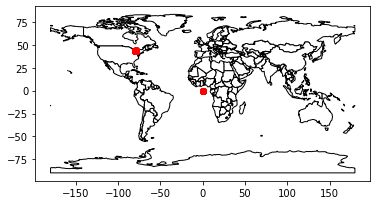

In [36]:
def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.Longitude, gdf.Latitude))
    gdf.Coordinates = gdf.Coordinates.apply(Point)
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

df_gdf = create_gdf(df)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
df_gdf.plot(ax=ax, color='red')
plt.show()

In [42]:
#locate outlier
print(df_gdf.loc[df_gdf.Longitude > -50].count()[0])
df_gdf.loc[df_gdf.Longitude > -50].sample(5)


441


,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,ucr_ext,offence,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,Coordinates
18063,274643,GO-20212035377,D55,2021/07/25 04:00:00+00,2021/10/22 04:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,...,25,206,Sunday,18,Assault,NSA,NSA,0.0,0.0,POINT (0.00000 0.00000)
28810,276078,GO-20212133274,D55,2021/11/05 04:00:00+00,2021/11/05 04:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,...,5,309,Friday,19,Assault,NSA,NSA,0.0,0.0,POINT (0.00000 0.00000)
33948,281634,GO-20212517011,NSA,2021/12/28 05:00:00+00,2021/12/31 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1610,220,Robbery - Other,...,28,362,Tuesday,22,Robbery,NSA,NSA,0.0,0.0,POINT (0.00000 0.00000)
23744,270982,GO-20211788816,D52,2021/09/18 04:00:00+00,2021/09/18 04:00:00+00,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430,100,Assault,...,18,261,Saturday,0,Assault,NSA,NSA,0.0,0.0,POINT (0.00000 0.00000)
17602,264920,GO-20211383891,NSA,2021/07/21 04:00:00+00,2021/07/23 04:00:00+00,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1420,100,Assault With Weapon,...,21,202,Wednesday,23,Assault,NSA,NSA,0.0,0.0,POINT (0.00000 0.00000)


In [43]:
# Remove outlier
cleaned_df = df_gdf.drop(df_gdf.loc[df_gdf.Longitude > -50].index, inplace=False)

In [47]:
# Print all columns
for col in cleaned_df.columns:
    print(col)

Index_
event_unique_id
Division
occurrencedate
reporteddate
location_type
premises_type
ucr_code
ucr_ext
offence
reportedyear
reportedmonth
reportedday
reporteddayofyear
reporteddayofweek
reportedhour
occurrenceyear
occurrencemonth
occurrenceday
occurrencedayofyear
occurrencedayofweek
occurrencehour
mci_category
Hood_ID
Neighbourhood
Longitude
Latitude
Coordinates


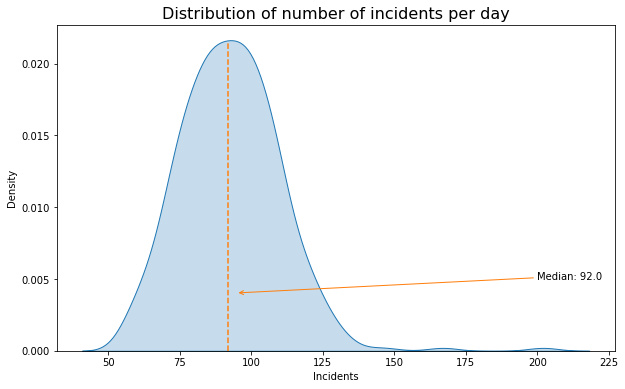

In [48]:
col = sns.color_palette()

plt.figure(figsize=(10, 6))
data = cleaned_df.groupby('occurrencedate').count().iloc[:, 0]
sns.kdeplot(data=data, shade=True)
plt.axvline(x=data.median(), ymax=0.95, linestyle='--', color=col[1])
plt.annotate(
    'Median: ' + str(data.median()),
    xy=(data.median(), 0.004),
    xytext=(200, 0.005),
    arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))
plt.title(
    'Distribution of number of incidents per day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()

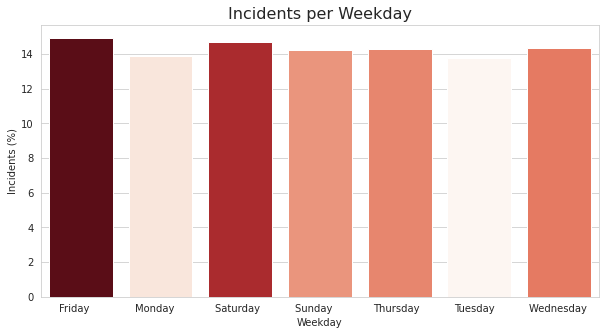

In [54]:
data = cleaned_df.groupby('occurrencedayofweek').count().iloc[:, 0]

plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        data.index, (data.values / data.values.sum()) * 100,
        orient='v',
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values))

plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

plt.show()

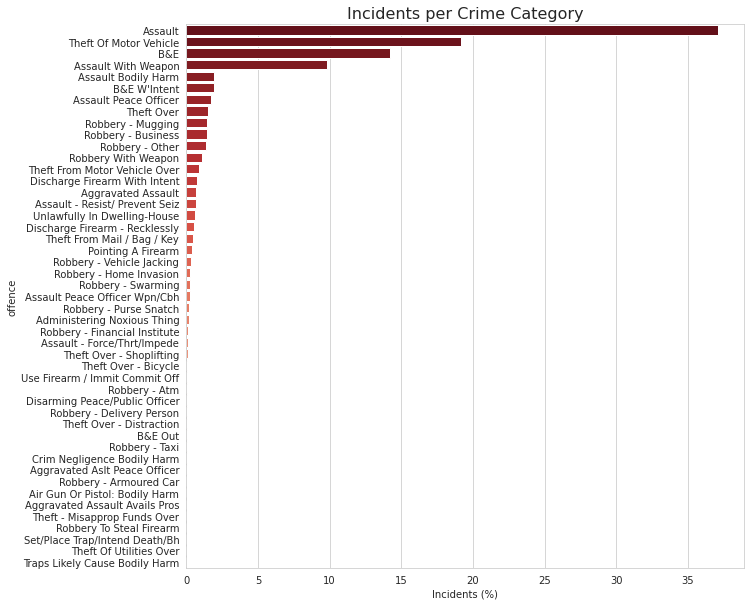

In [59]:
data = cleaned_df.groupby('offence').count().iloc[:, 0].sort_values(
    ascending=False)

plt.figure(figsize=(10, 10))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        (data.values / data.values.sum()) * 100,
        data.index,
        orient='h',
        palette="Reds_r")

plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

plt.show()

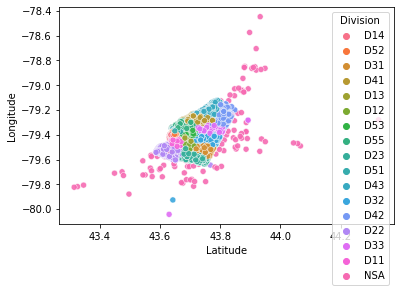

In [65]:
sns.scatterplot(x='Latitude',
               y='Longitude',
                hue='Division',
                alpha=0.9,
               data=cleaned_df)

In [66]:
!pip install folium

import folium
from folium.plugins import HeatMap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
crime_map = folium.Map(location=[43.651070,-79.347015], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = cleaned_df[cleaned_df.occurrenceyear == 2021]
data_heatmap = cleaned_df[['Latitude','Longitude']]
data_heatmap = cleaned_df.dropna(axis=0, subset=['Latitude','Longitude'])
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

crime_map